<a href="https://colab.research.google.com/github/adriadescals/MaximumSeparation_method/blob/master/MS_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# ! git clone https://github.com/adriadescals/MaximumSeparation_method.git

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
pathCsv = '/content/MaximumSeparation_method/toy_timeSeries.csv'
df = pd.read_csv(pathCsv) 


In [0]:
DOY = df.DOY.to_numpy()
GCC = df.GCC.to_numpy()

Text(0, 0.5, 'GCC')

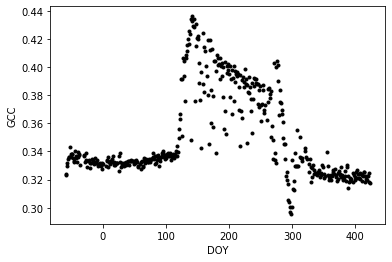

In [5]:
plt.plot(DOY, GCC,'.k')
plt.xlabel('DOY')
plt.ylabel('GCC')

In [0]:
thresh = 0.35;
wsize = 30;

Text(0, 0.5, 'GCC')

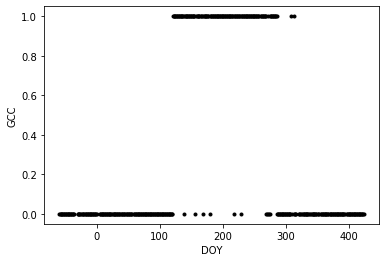

In [7]:
bio_bin = GCC>thresh; 

plt.plot(DOY, bio_bin,'.k')
plt.xlabel('DOY')
plt.ylabel('GCC>thresh')

Text(0, 0.5, 'diff')

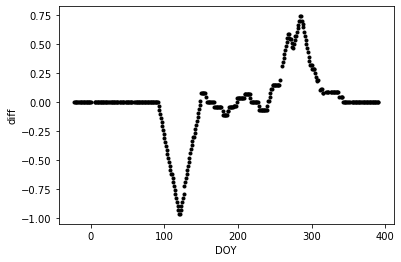

In [81]:
DOYdiff = np.array(DOY[wsize:-wsize],ndmin=2)
D = np.zeros((1,DOYdiff.shape[1]), dtype=float)
for idoy in np.nditer(DOYdiff.T):
  bin1 = bio_bin[np.logical_and(DOY>(idoy-wsize),DOY<idoy)]
  bin2 = bio_bin[np.logical_and(DOY<(idoy+wsize),DOY>idoy)]

  p1 = np.sum(bin1)/bin1.shape;
  p2 = np.sum(bin2)/bin2.shape;

  D[DOYdiff==idoy] = p1-p2

plt.plot(DOYdiff, D,'.k')
plt.xlabel('DOY')
plt.ylabel('diff')

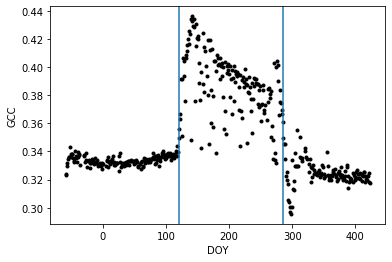

In [89]:
SoS = DOYdiff[0,np.argmin(D)]
EoS = DOYdiff[0,np.argmax(D)]

plt.plot(DOY, GCC,'.k')
plt.xlabel('DOY')
plt.ylabel('GCC')
plt.axvline(x=SoS)
plt.axvline(x=EoS)